In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [3]:
# Load CSV (drop `.txt` from the end to read as CSV)
url = "https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt"

In [4]:
df = pd.read_csv(url)

In [5]:
df.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


In [6]:
df.isna().sum()

,0
Unnamed: 0,0
Sqft,0
Floor,0
TotalFloor,0
Bedroom,0
Living.Room,0
Bathroom,0
Price,0


In [10]:
df.shape

(645, 8)

In [13]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [14]:
df.describe()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


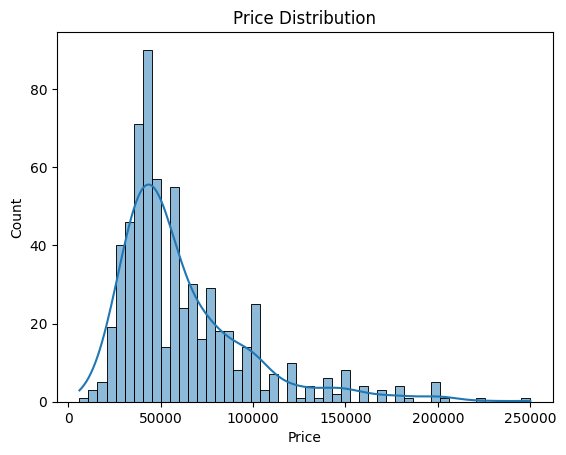

In [16]:
sns.histplot(df['Price'], kde=True,bins = 50)
plt.title('Price Distribution')
plt.show()

In [18]:
df.columns

Index(['Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room', 'Bathroom',
       'Price'],
      dtype='object')

In [20]:
feature_list = df.columns.to_list()
feature_list

['Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room', 'Bathroom', 'Price']

In [21]:
feature_list.remove('Price')
feature_list

['Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room', 'Bathroom']

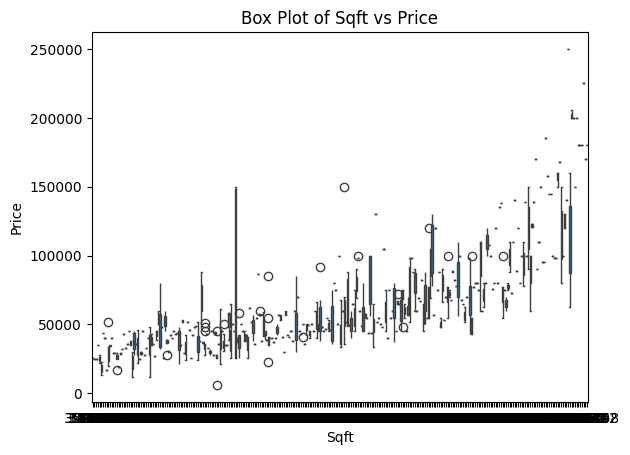

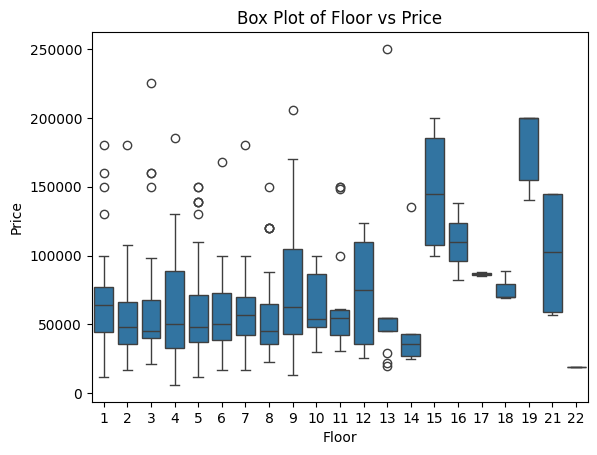

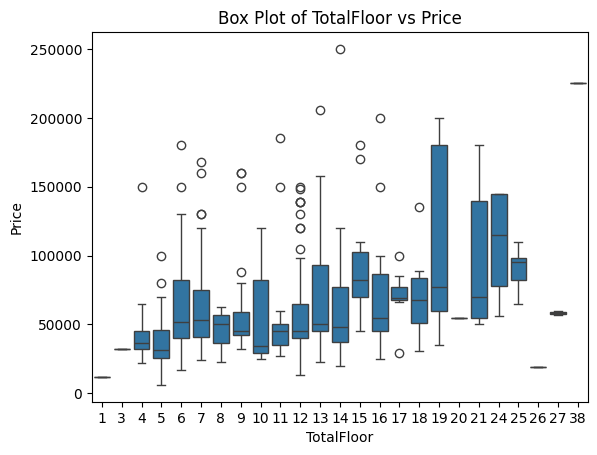

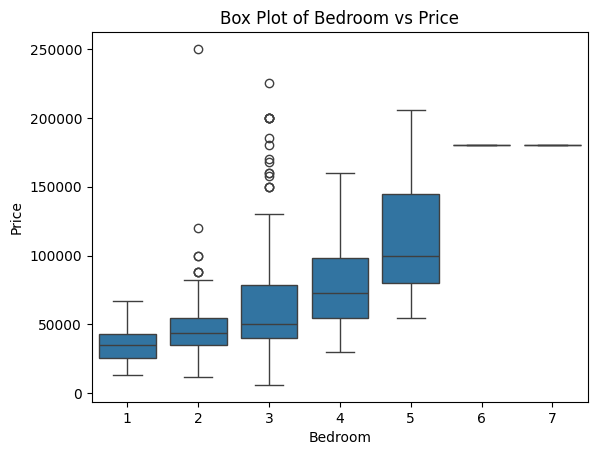

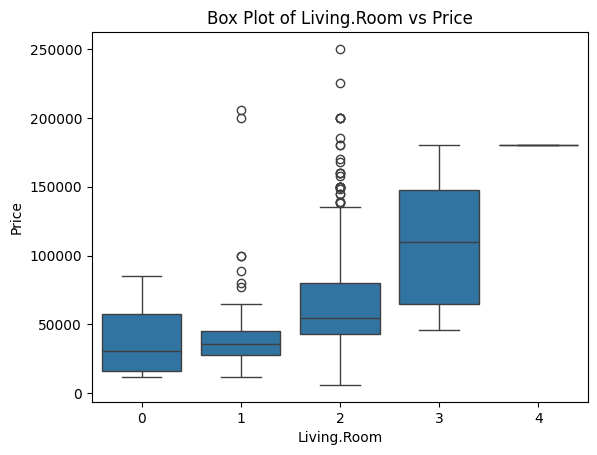

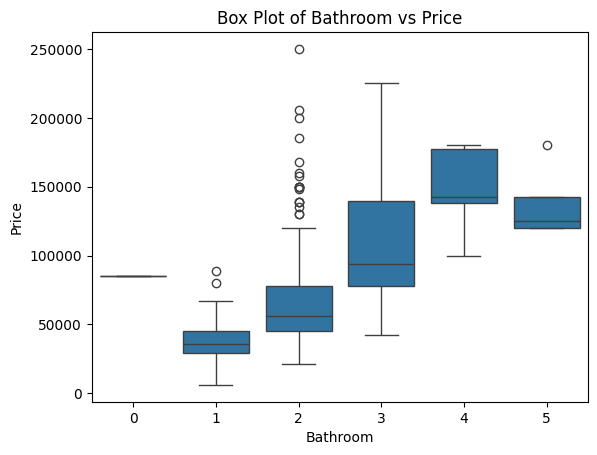

In [22]:
# lets make box plot of each feature with price
for feature in feature_list:
    sns.boxplot(x=df[feature], y=df['Price'])
    plt.title(f'Box Plot of {feature} vs Price')
    plt.show()

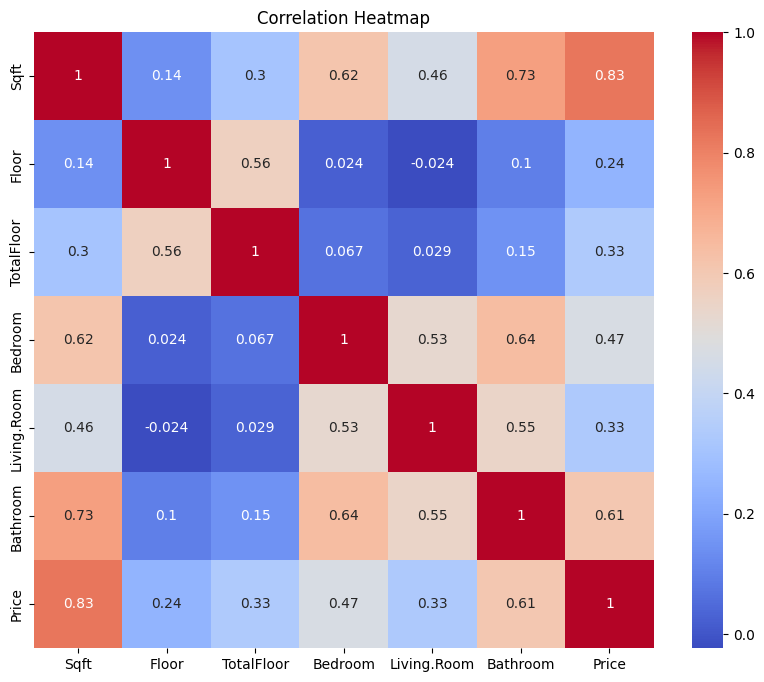

In [23]:
# Correlation Heat Map
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [24]:
X = df.drop('Price', axis=1)
y = df['Price']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [27]:
y_pred = knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 424579937.7755039


In [28]:
accuracy_knn = knn.score(X_test, y_test)
print(f'Accuracy of KNN: {accuracy_knn}')

Accuracy of KNN: 0.7041159685153562


In [29]:
errors = []
for k in range(1, 21):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    errors.append(mse)

In [30]:
print(errors)

[420595014.5271318, 494221370.5155039, 436812075.3798449, 411814252.1996124, 424579937.7755039, 402745792.11218774, 378166729.35943687, 384749570.2147529, 391517891.5024404, 397340094.11953485, 406989572.52649117, 397853283.7567829, 402134699.9747718, 401357736.36944306, 405113484.44913006, 402616824.34720206, 408579280.2256913, 409328676.3761364, 410287524.85679317, 410019770.2084108]


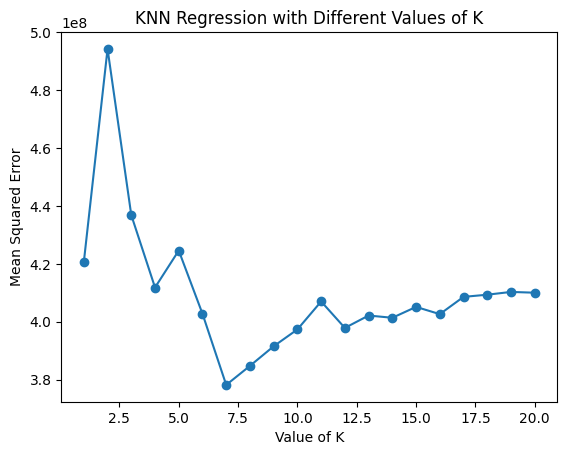

In [32]:
plt.plot(range(1, 21), errors, marker='o')
plt.xlabel('Value of K')
plt.ylabel('Mean Squared Error')
plt.title('KNN Regression with Different Values of K')
plt.show()

In [31]:
k_best = np.argmin(errors) + 1
print(f'The best value of k is: {k_best}')

The best value of k is: 7
